In [1]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
from datetime import datetime
import numpy as np

## Using the san sf temps dataset:
#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time..

In [2]:
temps_df = data.sf_temps()
temps_df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
temps_df = temps_df.set_index('date').sort_index()

<AxesSubplot:xlabel='date'>

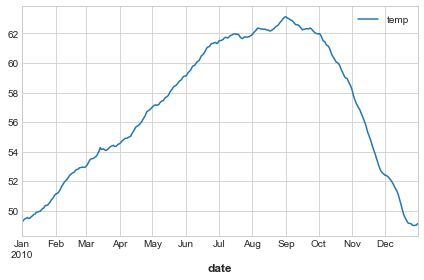

In [4]:
temps_df.resample('1D').mean().plot()

#### 2. Write the code necessary to visualize the minimum temperature over time.


<AxesSubplot:xlabel='date'>

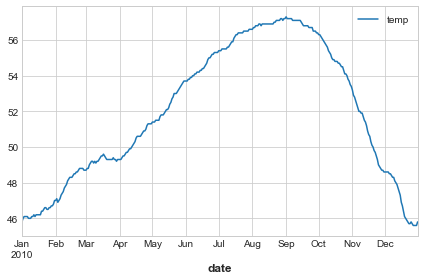

In [5]:
temps_df.resample('1D').min().plot()

#### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

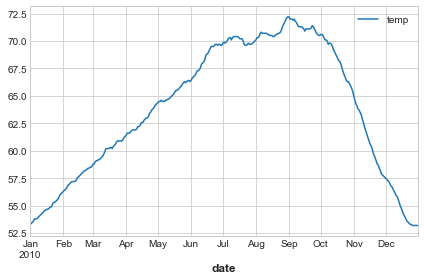

In [6]:
temps_df.resample('1D').max().plot()

<AxesSubplot:xlabel='date'>

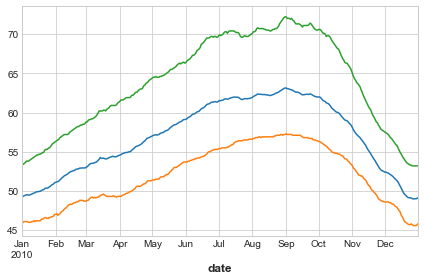

In [7]:
plt.figure()
temps_df.resample('1D').mean().temp.plot()
temps_df.resample('1D').min().temp.plot()
temps_df.resample('1D').max().temp.plot()

#### 4. Which month is the coldest, on average?

In [8]:
temps_df[temps_df['temp'] == temps_df.groupby(temps_df.index.month).temp.mean().min()]

,temp
date,


In [10]:
(temps_df.groupby(temps_df.index.month) == (temps_df.groupby(temps_df.index.month).temp.mean().min()))

False

In [11]:
avg_month_temp = pd.DataFrame(temps_df.groupby(temps_df.index.month).temp.mean())
avg_month_temp

,temp
date,
1,49.984140
2,52.243899
3,53.956528
4,55.633056
5,57.970968
6,60.444722
7,61.765457
8,62.405376
9,62.487083


In [12]:
avg_month_temp[avg_month_temp.temp == avg_month_temp.temp.min()]

,temp
date,
1,49.98414


> January is the coldest

#### 5. Which month has the highest average temperature?

In [13]:
avg_month_temp[avg_month_temp.temp == avg_month_temp.temp.max()]

,temp
date,
9,62.487083


> September

#### 5. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [20]:
temp_min_max = temps_df.resample('1D').agg(['min', 'max', 'mean'])

In [21]:
temp_change = temp_min_max['temp'].copy()

In [22]:
temp_change['tempdelta'] = temp_change['max'] - temp_change['min']

In [23]:
monthly_change = temp_change.resample('1M').mean()

In [24]:
monthly_change[monthly_change['tempdelta'] == monthly_change['tempdelta'].max()]

,min,max,mean,tempdelta
date,,,,
2010-09-30,56.903333,71.306667,62.487083,14.403333


> September has the highest monthly change

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines

<AxesSubplot:xlabel='date'>

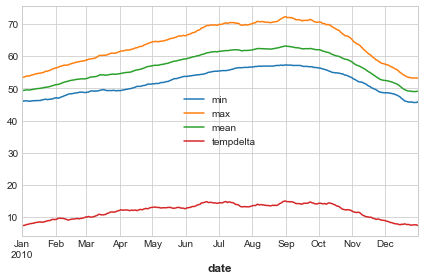

In [25]:
temp_change.plot()

## Use the seattle_weather dataset to answer the following questions:
#### Which year and month combination has the highest amount of precipitation?

In [26]:
seattle_df = data.seattle_weather()
seattle_df = seattle_df.set_index('date').sort_index()

In [27]:
max_month = seattle_df.resample('1M').max()
max_year_month = max_month.resample('1Y').max()
max_year_month[max_year_month['precipitation'] == max_year_month.precipitation.max()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-12-31,55.9,35.0,18.3,8.0,sun


> December 2015 had the highest amount of precipitation

#### Visualize the amount of monthly precipitation over time

In [28]:
month_precip = pd.DataFrame(seattle_df['precipitation'].resample('1M').mean())
month_precip

,precipitation
date,
2012-01-31,5.590323
2012-02-29,3.182759
2012-03-31,5.903226
2012-04-30,2.270000
2012-05-31,1.683871
2012-06-30,2.503333
2012-07-31,0.848387
2012-08-31,0.000000
2012-09-30,0.030000


<AxesSubplot:xlabel='date'>

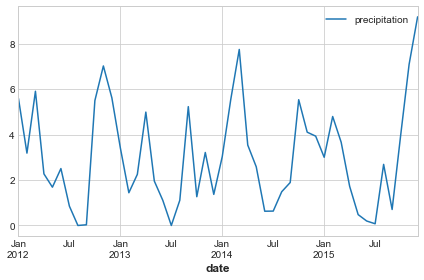

In [29]:
month_precip.plot()

#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.


In [30]:
wind = pd.DataFrame(seattle_df['wind'].resample('14D').mean())
wind

,wind
date,
2012-01-01,3.514286
2012-01-15,4.157143
2012-01-29,3.792857
2012-02-12,4.000000
2012-02-26,4.192857
...,...
2015-11-01,3.435714
2015-11-15,3.978571
2015-11-29,4.528571


<AxesSubplot:xlabel='date'>

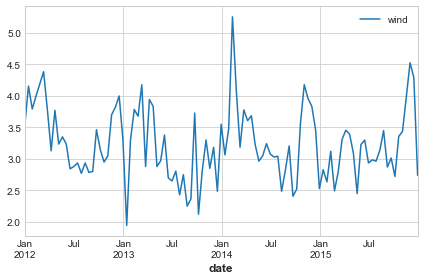

In [31]:
wind.plot()

#### Which year-month combination is the windiest?

In [32]:
max_year_month[max_year_month['wind'] == max_year_month.wind.max()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,54.1,34.4,18.3,9.5,sun


> windiest year/month combination is december 2012 (end of the mayan calendar!!!)

#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [33]:
sun_df = seattle_df[seattle_df['weather'] == 'sun']
sun_df.resample('1Y').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


> 2014 had the sunniest year

In [34]:
month = seattle_df.resample('1M').max()
month_precip = month['precipitation'].copy()
month_precip

date
2012-01-31    27.7
2012-02-29    17.3
2012-03-31    27.4
2012-04-30    10.9
2012-05-31    18.5
2012-06-30    16.5
2012-07-31    15.2
2012-08-31     0.0
2012-09-30     0.3
2012-10-31    34.5
2012-11-30    54.1
2012-12-31    22.6
2013-01-31    38.4
2013-02-28     9.4
2013-03-31    11.9
2013-04-30    39.1
2013-05-31    13.7
2013-06-30     9.9
2013-07-31     0.0
2013-08-31    19.3
2013-09-30    43.4
2013-10-31     9.1
2013-11-30    30.0
2013-12-31    10.7
2014-01-31    21.6
2014-02-28    26.4
2014-03-31    46.7
2014-04-30    18.5
2014-05-31    33.3
2014-06-30     6.4
2014-07-31    19.3
2014-08-31    21.6
2014-09-30    20.3
2014-10-31    32.0
2014-11-30    34.3
2014-12-31    20.6
2015-01-31    26.2
2015-02-28    26.2
2015-03-31    55.9
2015-04-30    14.0
2015-05-31     6.1
2015-06-30     4.6
2015-07-31     2.0
2015-08-31    32.5
2015-09-30     5.8
2015-10-31    33.0
2015-11-30    47.2
2015-12-31    54.1
Freq: M, Name: precipitation, dtype: float64

In [35]:
month[month['precipitation'] == month_precip.max()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-31,55.9,20.6,10.6,5.7,sun


In [36]:
month_precip = pd.DataFrame(seattle_df.groupby(seattle_df.index.month).precipitation.mean())

In [37]:
month_precip[month_precip['precipitation'] == month_precip.precipitation.max()]

,precipitation
date,
11,5.354167


> November is the wettest month

#### Which month has the most number of days with a non-zero amount of precipitation?

In [38]:
nonzero = seattle_df[seattle_df['precipitation'] != 0]

In [39]:
nonzero = pd.DataFrame(nonzero.groupby(nonzero.index.month).count())

In [40]:
nonzero[nonzero['precipitation'] == nonzero['precipitation'].max()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
12,81,81,81,81,81


> December has the most days where it precipitated

In [46]:
flights = data.flights_20k()

In [47]:
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [48]:
flights = flights.set_index('date').sort_index()
flights

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,-5,318,FLL,JAX
2001-03-31 21:05:00,-1,451,MCI,IND


In [52]:
flights['delay'] = flights['delay'].apply(lambda x : x if x > 0 else 0)
flights

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


In [55]:
hour = flights.resample('1H').mean()

This assumes that nulls are hours in which there were no delays, and no distance travelled

In [62]:
hour['delay'] = hour['delay'].fillna(0)
hour['distance'] = hour['distance'].fillna(0)

In [63]:
hour

,delay,distance
date,,
2001-01-01 00:00:00,14.000000,405.000000
2001-01-01 01:00:00,0.000000,0.000000
2001-01-01 02:00:00,0.000000,0.000000
2001-01-01 03:00:00,0.000000,0.000000
2001-01-01 04:00:00,0.000000,0.000000
...,...,...
2001-03-31 17:00:00,11.666667,512.888889
2001-03-31 18:00:00,12.538462,568.461538
2001-03-31 19:00:00,22.125000,526.375000


In [66]:
mean_hr_delay = pd.DataFrame(hour.groupby(hour.index.hour).delay.mean())

In [67]:
mean_hr_delay[mean_hr_delay['delay'] == mean_hr_delay['delay'].max()]

,delay
date,
22,28.575579


> Highest average delay happens at 10pm 

In [69]:
day = flights.resample('1D').mean()

In [70]:
day['delay'] = day['delay'].fillna(0)
day['distance'] = day['distance'].fillna(0)

In [77]:
day

,delay,distance
date,,
2001-01-01,8.747126,567.729885
2001-01-02,21.808411,491.509346
2001-01-03,17.150000,488.987500
2001-01-04,7.176724,496.603448
2001-01-05,9.294118,484.546218
...,...,...
2001-03-27,4.669683,515.868778
2001-03-28,3.551282,496.914530
2001-03-29,13.545455,545.268182


In [78]:
mean_day_delay = pd.DataFrame(day.groupby(day.index.day).delay.mean())

In [79]:
mean_day_delay

,delay
date,
1,9.345737
2,13.197617
3,8.994190
4,11.237901
5,7.269406
6,6.795423
7,8.882326
8,9.924692
9,18.065794


In [80]:
mean_day_delay[mean_day_delay['delay'] == mean_day_delay['delay'].max()]

,delay
date,
16,20.455744


> The 16th of a month has the highest mean delay

In [89]:
month = flights.resample('1M').mean()
month['delay'] = month['delay'].fillna(0)
month['distance'] = month['distance'].fillna(0)
mean_month_delay = pd.DataFrame(month.groupby(month.index.month).delay.mean())
mean_month_delay[mean_month_delay['delay'] == mean_month_delay['delay'].max()]

,delay
date,
2,12.306106


> Month with the highest mean delay is february

## Bonus

In [91]:
iowa = data.iowa_electricity()
iowa

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


In [93]:
iowa = iowa.set_index('year').sort_index()

In [107]:
fossil = iowa[iowa['source'] == 'Fossil Fuels']
fossil

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2002-01-01,Fossil Fuels,35991
2003-01-01,Fossil Fuels,36234
2004-01-01,Fossil Fuels,36205
2005-01-01,Fossil Fuels,36883
2006-01-01,Fossil Fuels,37014
2007-01-01,Fossil Fuels,41389
2008-01-01,Fossil Fuels,42734
2009-01-01,Fossil Fuels,38620


In [102]:
nuclear =iowa[iowa['source'] == 'Nuclear Energy']

In [103]:
renew = iowa[iowa['source'] == 'Renewables']

In [106]:
pd.DataFrame(iowa.groupby(iowa.index.year).net_generation.mean())

,net_generation
year,
2001,13550.333333
2002,14176.000000
2003,14035.666667
2004,14412.000000
2005,14715.000000
2006,15157.666667
2007,16592.666667
2008,17695.333333
2009,17286.333333


In [114]:
combined = fossil.merge(nuclear, on = 'year') 

In [117]:
combined = combined.merge(renew, on = 'year')

In [118]:
combined

,source_x,net_generation_x,source_y,net_generation_y,source,net_generation
year,,,,,,
2001-01-01,Fossil Fuels,35361,Nuclear Energy,3853,Renewables,1437
2002-01-01,Fossil Fuels,35991,Nuclear Energy,4574,Renewables,1963
2003-01-01,Fossil Fuels,36234,Nuclear Energy,3988,Renewables,1885
2004-01-01,Fossil Fuels,36205,Nuclear Energy,4929,Renewables,2102
2005-01-01,Fossil Fuels,36883,Nuclear Energy,4538,Renewables,2724
2006-01-01,Fossil Fuels,37014,Nuclear Energy,5095,Renewables,3364
2007-01-01,Fossil Fuels,41389,Nuclear Energy,4519,Renewables,3870
2008-01-01,Fossil Fuels,42734,Nuclear Energy,5282,Renewables,5070
2009-01-01,Fossil Fuels,38620,Nuclear Energy,4679,Renewables,8560


In [119]:
combined['total'] = combined['net_generation_x'] + combined['net_generation_y'] + combined['net_generation']

In [123]:
combined.rename(columns = {'net_generation_x':'fossil_fuels','net_generation_y':'nuclear_energy','net_generation':'renewables'}, inplace = True)

In [129]:
combined.drop(columns = ['source_x','source_y','source'], inplace = True)

In [136]:
energy = combined.copy()

In [137]:
energy['fossil_pct'] = energy['fossil_fuels']/energy['total']

In [138]:
energy['nuclear_pct'] = energy['nuclear_energy']/energy['total']

In [139]:
energy['renewable_pct'] = energy['renewables']/energy['total']

In [140]:
energy

,fossil_fuels,nuclear_energy,renewables,total,fossil_pct,nuclear_pct,renewable_pct
year,,,,,,,
2001-01-01,35361,3853,1437,40651,0.869868,0.094782,0.035350
2002-01-01,35991,4574,1963,42528,0.846290,0.107553,0.046158
2003-01-01,36234,3988,1885,42107,0.860522,0.094711,0.044767
2004-01-01,36205,4929,2102,43236,0.837381,0.114002,0.048617
2005-01-01,36883,4538,2724,44145,0.835497,0.102798,0.061706
2006-01-01,37014,5095,3364,45473,0.813978,0.112045,0.073978
2007-01-01,41389,4519,3870,49778,0.831472,0.090783,0.077745
2008-01-01,42734,5282,5070,53086,0.804996,0.099499,0.095505
2009-01-01,38620,4679,8560,51859,0.744712,0.090225,0.165063


<AxesSubplot:xlabel='year'>

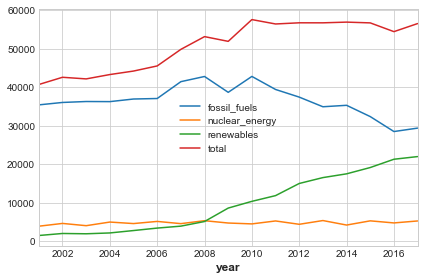

In [144]:
gen_bysource = energy[['fossil_fuels','nuclear_energy','renewables','total']]
gen_bysource.plot()

<AxesSubplot:xlabel='year'>

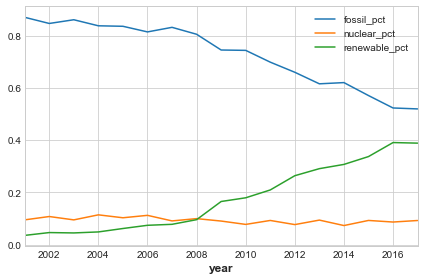

In [143]:
gen_bypct = energy[['fossil_pct','nuclear_pct','renewable_pct']]
gen_bypct.plot()

In [148]:
gen_bysource.pivot_table

<bound method DataFrame.pivot_table of             fossil_fuels  nuclear_energy  renewables  total
year                                                       
2001-01-01         35361            3853        1437  40651
2002-01-01         35991            4574        1963  42528
2003-01-01         36234            3988        1885  42107
2004-01-01         36205            4929        2102  43236
2005-01-01         36883            4538        2724  44145
2006-01-01         37014            5095        3364  45473
2007-01-01         41389            4519        3870  49778
2008-01-01         42734            5282        5070  53086
2009-01-01         38620            4679        8560  51859
2010-01-01         42750            4451       10308  57509
2011-01-01         39361            5215       11795  56371
2012-01-01         37379            4347       14949  56675
2013-01-01         34873            5321       16476  56670
2014-01-01         35250            4152       17452  56854
2

In [152]:
iowa.pivot_table(index = 'source',values = 'net_generation',columns = 'year')

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


<AxesSubplot:xlabel='year'>

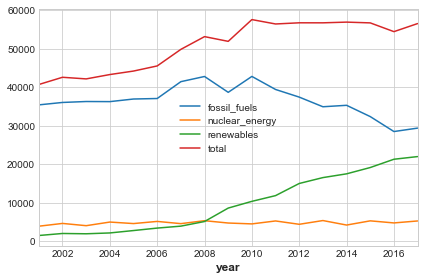

In [153]:
gen_bysource = energy[['fossil_fuels','nuclear_energy','renewables','total']]
gen_bysource.plot()

<AxesSubplot:xlabel='year'>

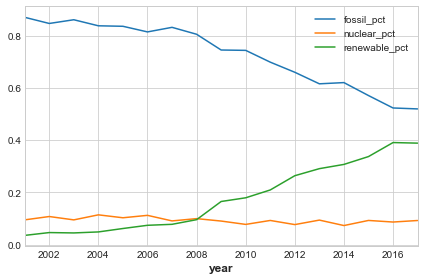

In [154]:
gen_bypct = energy[['fossil_pct','nuclear_pct','renewable_pct']]
gen_bypct.plot()

> total genearation is not increasing after 2010, although there is a slight upward slope between 2016 and 2017. You could control for increasing consumption by dividing power by consumption, then see how much each source is supplying to meet that consumption. 

# Prepare Exercises
Using store data:

In [3]:
stores_df = pd.read_csv('store_item_sales.csv').drop(columns = 'Unnamed: 0')

In [4]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ MB


#### 1. Convert date column to datetime format.

In [5]:
stores_df['sale_date'] = pd.to_datetime(stores_df['sale_date'])

In [6]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   item_id        913000 non-null  int64              
 1   sale_amount    913000 non-null  float64            
 2   sale_date      913000 non-null  datetime64[ns, UTC]
 3   sale_id        913000 non-null  int64              
 4   store_id       913000 non-null  int64              
 5   item_brand     913000 non-null  object             
 6   item_name      913000 non-null  object             
 7   item_price     913000 non-null  float64            
 8   item_upc12     913000 non-null  int64              
 9   item_upc14     913000 non-null  int64              
 10  store_address  913000 non-null  object             
 11  store_city     913000 non-null  object             
 12  store_state    913000 non-null  object             
 13  store_zipcode  913000 non-nul

#### 2.Plot the distribution of sale_amount and item_price.

array([[<AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'item_price'}>]], dtype=object)

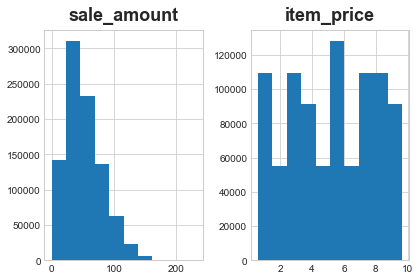

In [7]:
stores_df[['sale_amount','item_price']].hist()

In [8]:
stores_df

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,2013-01-02 00:00:00+00:00,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,2013-01-03 00:00:00+00:00,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,2013-01-04 00:00:00+00:00,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,2013-01-05 00:00:00+00:00,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,63.0,2017-12-27 00:00:00+00:00,912996,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231
912996,50,59.0,2017-12-28 00:00:00+00:00,912997,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231
912997,50,74.0,2017-12-29 00:00:00+00:00,912998,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231
912998,50,62.0,2017-12-30 00:00:00+00:00,912999,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231


#### 3. Set the index to be the datetime variable.


In [9]:
stores_df = stores_df.set_index('sale_date').sort_index()

In [10]:
stores_df

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,34,21.0,619014,9,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,TX,78221
2017-12-31 00:00:00+00:00,34,32.0,620840,10,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,TX,78231
2017-12-31 00:00:00+00:00,35,55.0,622666,1,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


#### 4. Add a 'month' and 'day of week' column to your dataframe.


In [11]:
stores_df['day'] =  stores_df.index.day_name()

In [12]:
stores_df['month'] = stores_df.index.month

In [13]:
stores_df

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,day,month
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Tuesday,1
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,1
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,1
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,Tuesday,1
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,34,21.0,619014,9,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,TX,78221,Sunday,12
2017-12-31 00:00:00+00:00,34,32.0,620840,10,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,TX,78231,Sunday,12
2017-12-31 00:00:00+00:00,35,55.0,622666,1,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Sunday,12


#### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price

In [14]:
stores_df['sales_total'] = stores_df['sale_amount'] * stores_df['item_price']

In [15]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  day            913000 non-null  object 
 14  month          913000 non-null  int64  
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(7), obj

#### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [16]:
def prep_stores(df):
    df['sale_date'] = pd.to_datetime(df['sale_date']).drop(columns = 'Unnamed: 0')
    df = df.set_index('sale_date').sort_index()
    df['day'] =  df.index.day_name()
    df['month'] = df.index.month
    df['sales_total'] = df['sale_amount'] * df['item_price']
    return df

In [17]:
test_stores = pd.read_csv('store_item_sales.csv')

In [18]:
prep_stores(test_stores)

,Unnamed: 0,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,day,month,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Tuesday,1,10.92
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,1,218.40
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,1,125.55
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,Tuesday,1,453.60
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,Tuesday,1,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,619013,34,21.0,619014,9,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,TX,78221,Sunday,12,87.57
2017-12-31 00:00:00+00:00,620839,34,32.0,620840,10,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,TX,78231,Sunday,12,133.44
2017-12-31 00:00:00+00:00,622665,35,55.0,622666,1,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Sunday,12,285.45


In [19]:
stores_df.to_csv('clean_store.csv')

In [20]:
pd.read_csv('clean_store.csv', index_col = 'sale_date', infer_datetime_format = True)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,day,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Tuesday,1,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,1,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,1,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,Tuesday,1,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,Tuesday,1,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,34,21.0,619014,9,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,TX,78221,Sunday,12,87.57
2017-12-31 00:00:00+00:00,34,32.0,620840,10,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,TX,78231,Sunday,12,133.44
2017-12-31 00:00:00+00:00,35,55.0,622666,1,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Sunday,12,285.45


#### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [21]:
power = pd.read_csv('power.csv').drop(columns = 'Unnamed: 0')

In [22]:
power

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


#### 1.Convert date column to datetime format.

In [23]:
power['Date'] = pd.to_datetime(power['Date'])

#### 2. Plot distribution of variables and set the index to datetime

In [24]:
power = power.set_index('Date').sort_index()

<AxesSubplot:xlabel='Date'>

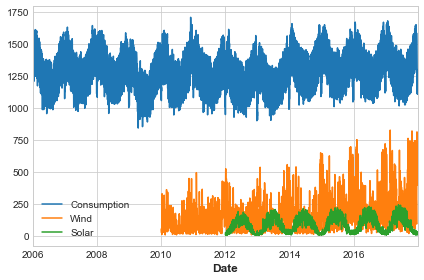

In [25]:
power[['Consumption','Wind','Solar']].plot()

<AxesSubplot:xlabel='Date'>

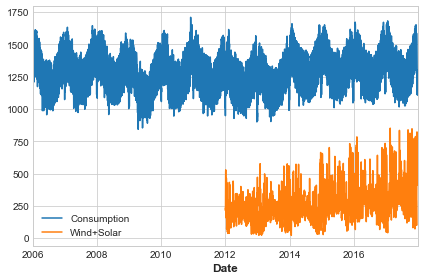

In [26]:
power[['Consumption','Wind+Solar']].plot()

#### 3. Add a month and a year column to your dataframe

In [27]:
power['month'] = power.index.month
power['year'] = power.index.year

#### 4. Fill any missing values.

In [28]:
power.fillna(0)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


In [29]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


#### 5. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [30]:
def prep_power(df):
    df = df.drop(columns = 'Unnamed: 0')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date').sort_index()
    df['day'] =  df.index.day_name()
    df['month'] = df.index.month
    df = df.fillna(0)
    return df

In [31]:
prep_power(pd.read_csv('power.csv'))

,Consumption,Wind,Solar,Wind+Solar,day,month
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,Sunday,1
2006-01-02,1380.52100,0.000,0.000,0.000,Monday,1
2006-01-03,1442.53300,0.000,0.000,0.000,Tuesday,1
2006-01-04,1457.21700,0.000,0.000,0.000,Wednesday,1
2006-01-05,1477.13100,0.000,0.000,0.000,Thursday,1
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,Wednesday,12
2017-12-28,1299.86398,506.424,14.162,520.586,Thursday,12
2017-12-29,1295.08753,584.277,29.854,614.131,Friday,12
